In [3]:
import os, re

#data specific stuff
from  scipy import stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# we'll take stuff line by line 
# because I'm too lazy to rip the json
pp = r'{"achievement_description":.*?}'
pp = re.compile(pp, re.DOTALL)

os.chdir('Desktop')
os.chdir('MONTAUD')


In [4]:
p_row = re.compile(r'<tr class="">(.*?)</tr>',re.DOTALL)
p_cell = re.compile(r'<td.*?>(.*?)</td>',re.DOTALL)
pn = re.compile(r'">(.*?)</a>')
pid = re.compile(r'athletes/(\d+)')
pnum = re.compile(r'\d[\d|\.]*')


In [5]:
class rider(object):
    
    def __init__(self,row):
        
        self.name, date, speed, tt, watts, vam, time = row[1:]
        
        xx = pnum.search(speed)
        if xx:  self.speed = float(xx.group())
        
        self.has_powermeter = watts.find('Powermeter') > 0
        xx = re.search('\d+',watts)
        if xx:  self.watts = int(xx.group())
            
            
        #this is stupid group(1) fails
        self.id_num = int(pid.search(self.name).group().split('/')[1])
        try:
            self.vam = float(vam.replace(',',''))
        except:
            self.vam = None
        
        mins,secs = time.split(':')
        self.time = int(mins)*60 + int(secs)
        
        #reset name
        tt =  pn.search(self.name)
        if tt : self.name = tt.group(1)
            
    def __str__(self):
        return '%s %f'%(self.name,self.speed)


In [13]:
fns = ['montaud1.htm','montaud2.htm','colomb.htm']
data = {}
for fn in fns:
    mm = p_row.findall(file(fn,'r').read())
    table = [rider(p_cell.findall(row)) for row in  mm]
    data[fn] = dict((x.id_num, x) for x in table)
    

Now we have to find everyone who is in the top 20 on all these races.

In [71]:
a,b,c = [set(data[fn].keys()) for fn in fns]
ids = a.intersection(a).intersection(b)
ids = ids.intersection(c)
#and the ones that have a power meter
idps = [x for x in ids if data[fns[1]][x].has_powermeter]

In [57]:

pmts = [ [data[fn][idx].time for idx in idps] 
                              for fn in fns ]

npmts = [ [data[fn][idx].time for idx in ids if  idx not in idps] 
                              for fn in fns ]

labels =  [ data[fns[0]][idx].name.split(' ')[0] for idx in idps  ]


So we have filtered out only riders with power meters in idps

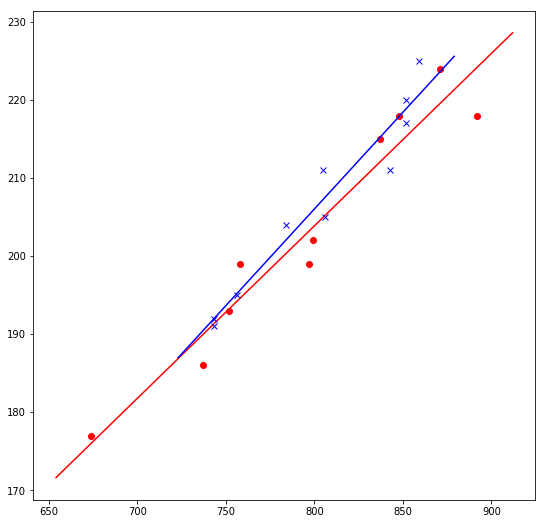

In [55]:
jj = 1,2
style = ['bx','ro']
style2 = ['b-','r-']
for L in pmts,npmts:
    XS,YS = [L[j] for j in jj]
    plt.plot(XS,YS,style.pop() )
    #now add the regression line
    pts = min(XS) - 20,max(XS) + 20
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(XS),
                                                                   np.array(YS))
 
    plt.plot(pts,[slope*x + intercept for x in pts ],style2.pop() )
    
    


In [67]:
plt.rcParams['figure.figsize'] = 7, 7

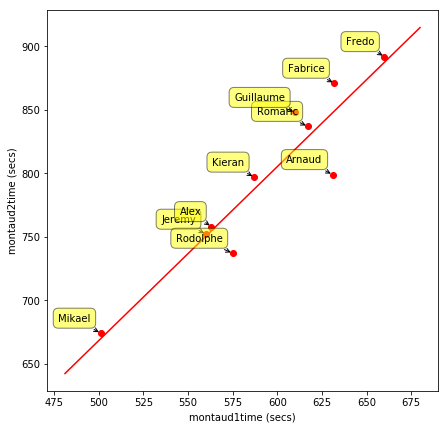

In [68]:
XS,YS = pmts[0],pmts[1]
xlabel,ylabel = [x.split('.')[0] + 'time (secs)' for x in [fns[0],fns[1]] ]

plt.plot(XS,YS,'or')
for label, x, y in zip(labels, XS, YS):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

#now add the regression line
pts = min(XS) - 20,max(XS) + 20
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(XS),
                                                               np.array(YS))
plt.plot(pts,[slope*x + intercept for x in pts ],'r-' )
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [70]:
slopes = [(float(data['colomb.htm'][id_].speed)/data['montaud1.htm'][id_].speed,
                           data['montaud2.htm'][id_].name)
          for id_ in ids ]
slopes.sort(key = lambda x : x[0])

for x,y in slopes:
    print '%.2f %s' % (x,y)
  

0.94 Thibault Menu
0.96 Vincent Kerdra
0.97 christophe rostaing-troux
0.98 Guillaume Vereecke
0.99 Jules Vial
0.99 Fabrice Mazza
1.00 Alex C
1.00 Mikael Gallego🇪🇸
1.00 Philippe Meunier
1.01 Romaric TYTGAT
1.01 Simon Wood
1.02 Jeremy Brunello
1.02 Guillaume Rostalski
1.03 Laurent Derain
1.03 Florian Giboin
1.04 Joris Ronflet
1.04 Kieran McShane
1.06 Fredo B
1.08 Rodolphe Lourd (albator83)
1.10 Arnaud Feodoroff


In [138]:
import lxml.html as lh
#http://docs.python-guide.org/en/latest/scenarios/scrape/

In [139]:
<td class='athlete'>

'<!DOCTYPE html>\n<!-- saved from url=(0066)https://www.strava.com/segments/6903988?filter=overall&gen'

In [252]:
#tree = lh.parse(data)

In [163]:
#This will create a list of buyers:
riders = tree.xpath("//tr[@class='']>/text")


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
xx=  data['montaud1.htm']
